First of all, I import the libraries which I need for this project:




In [3]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
from google.colab import files
import io
warnings.filterwarnings('ignore')

# Load the data set
Let's load the data sets **country_vaccinations** into a pandas dataframe.

In [4]:
uploader = files.upload()

# loading the dataset 
df = pd.read_csv(io.BytesIO(uploader['country_vaccinations.csv']))
print('Shape of data',df.shape)
#see the first five of our dataframe
df.head()

Saving country_vaccinations.csv to country_vaccinations (1).csv
Shape of data (7897, 15)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


#Data Cleaning 
Now, let's check out if we have any missing data in our dataset.


In [6]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3008
people_vaccinated                      3559
people_fully_vaccinated                4936
daily_vaccinations_raw                 3785
daily_vaccinations                      188
total_vaccinations_per_hundred         3008
people_vaccinated_per_hundred          3559
people_fully_vaccinated_per_hundred    4936
daily_vaccinations_per_million          188
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

As can be seen, there is quite much missing data. 
Let's drop total_vaccinations missing data, as without this value any raw doesn't make much sense.

In [8]:
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       621
people_fully_vaccinated                1929
daily_vaccinations_raw                  777
daily_vaccinations                      166
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           621
people_fully_vaccinated_per_hundred    1929
daily_vaccinations_per_million          166
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

## people_vaccinated

In [10]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
23,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://coronavirus.al/lajme/covid19-ministria...
25,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://coronavirus.al/lajme/covid19-ministria...


As can bee seen from our data, the values of total_vaccinations column are mostly the same as people_vaccenated column's.

Let's check the correlation to understand if it is so.

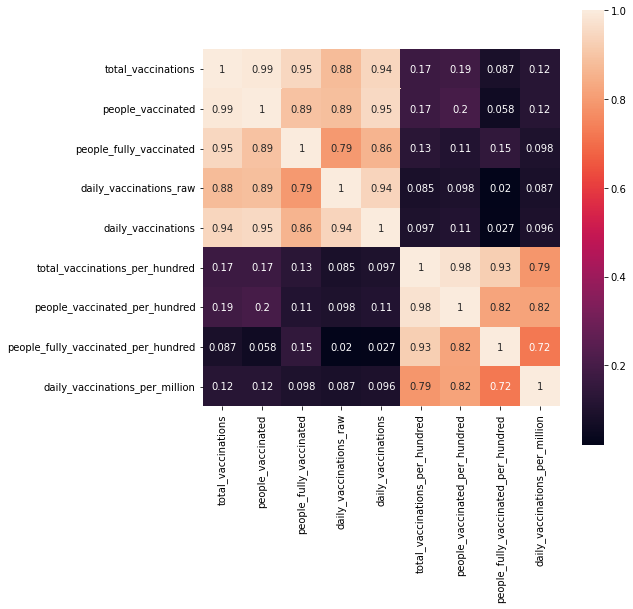

In [12]:
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

In [15]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)
df.people_vaccinated = df.people_vaccinated.fillna(0) #this should not be replaced with zeros. In the project, you need to fill with the appropriate numbers (see hint). 
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

#Exploratory Data Analysis

##1.Which countries are the most vaccinated?

Vaccines for COVID-19 have been in clinical trials since mid-late 2020, and were officially rolled out and in use from December 2020, and have been implemented in more and more countries over time.

The question is, regardless of population, which countries have inoculated the most people?

In [16]:
#Showing Country name without duplicates.
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

,country,people_vaccinated
0,United States,83930495.0
1,India,42731952.0
2,United Kingdom,28327873.0
3,England,24137423.0
4,Brazil,11559487.0


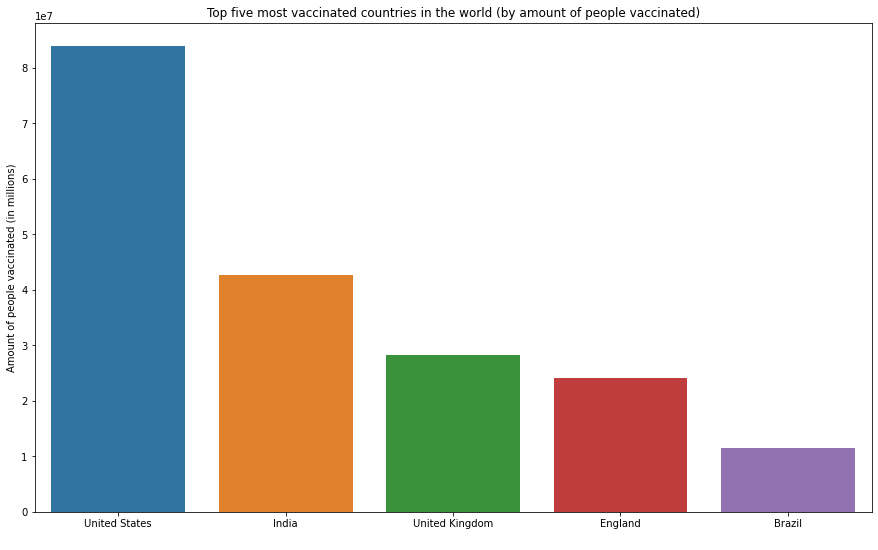

In [17]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_total_vaccinations = df.groupby('country').people_vaccinated.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.dropna(axis=0).reset_index() # Dropping NaN values

display(total_vaccinations_f[0:5])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top five most vaccinated countries in the world (by amount of people vaccinated)')
sns.barplot(x=total_vaccinations_f.country[0:5], y=total_vaccinations_f['people_vaccinated'])
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated (in millions)');

Those numbers look promising, but note that the top five countries also happen to be the most populous, and the ratio of those vaccinated to those that are not really matters when considering the rate of transmission, and emergence of new variants.

##2.Which countries have the most effective vaccination programme?

Many countries are the midst of their vaccination programs at this moment in time. Whilst some countries have not started their vaccination roll out yet, other countries are well underway to inoculate the population. But which countries have the best and most effective vaccination roll out?

,country,daily_vaccinations
0,United States,2541597.0
1,India,2253821.0
2,China,2077810.0
3,United Kingdom,602266.0
4,England,507875.0
...,...,...
146,Montserrat,43.0
147,Bahamas,0.0
148,Equatorial Guinea,0.0
149,Laos,0.0


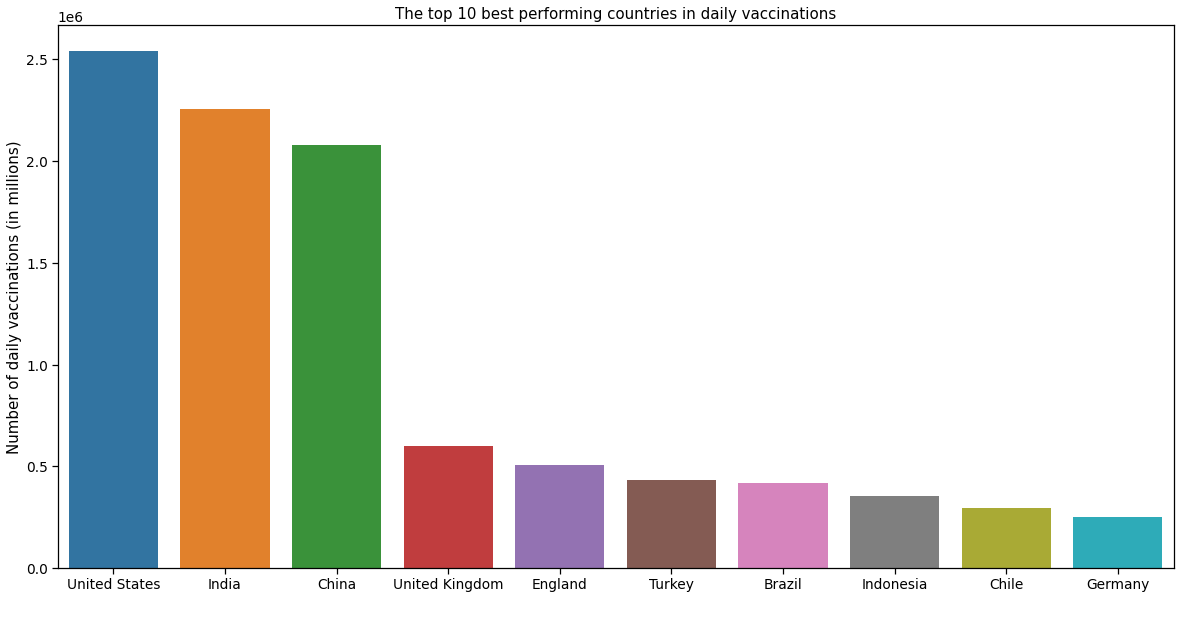

In [19]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_daily = df.groupby('country').daily_vaccinations.max().sort_values(ascending=False)
top_daily_f = top_daily.dropna(axis='rows').reset_index() # Dropping NaN values

display(top_daily_f)

# Plotting the data
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(20, 10))
    plt.title('The top 10 best performing countries in daily vaccinations')
    sns.barplot(x=top_daily_f.country[0:10], y=top_daily_f.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.ylabel('Number of daily vaccinations (in millions)');

We can see a pattern emerging within the countries that seem to be the best performing; the pattern being the countries which have a bigger population, more infrastructure and resources and bigger vaccine supply, appear to be vaccinating at speed, and thus becoming more vaccinated as the days go by. However, GDP is not a factor here, as many of the majority of the countries in the top ten are either developing or third-world countries - which is also interesting.

##3.Plotting this data to see the progression in daily vaccinations over time 




,country,date,daily_vaccinations
500,Brazil,2021-01-16,0.0
1211,England,2020-12-13,0.0
870,China,2020-12-15,0.0
790,Chile,2021-01-03,0.0
780,Chile,2020-12-24,0.0
...,...,...,...
4736,United States,2021-03-21,2488734.0
4737,United States,2021-03-22,2489697.0
4738,United States,2021-03-23,2497025.0
4733,United States,2021-03-18,2503731.0


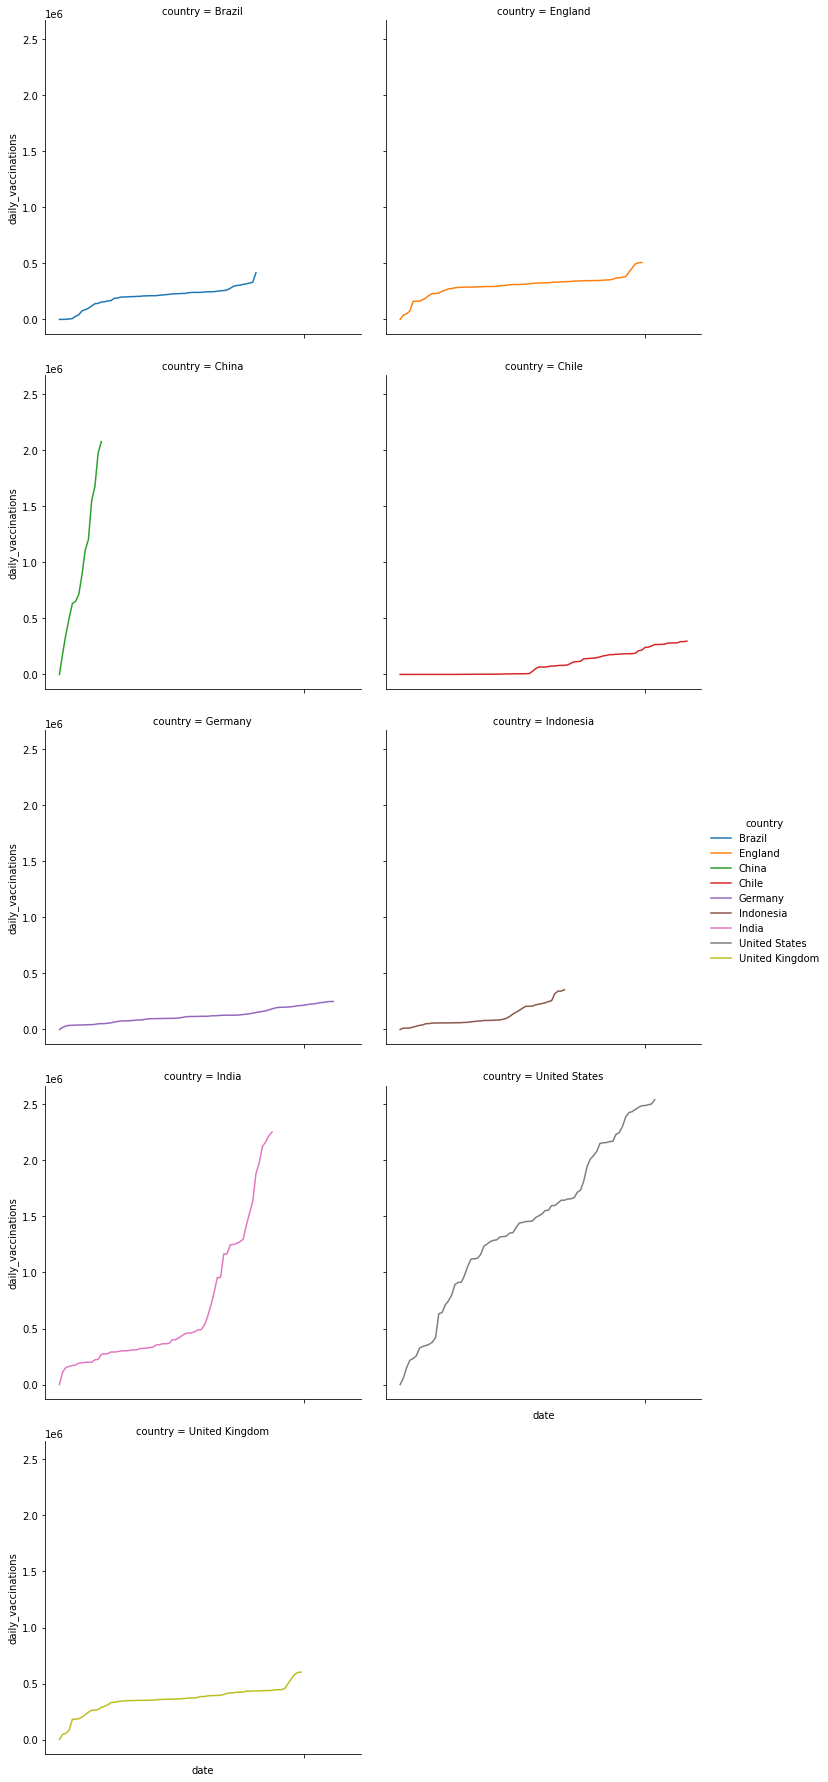

In [22]:
# Establishing which columns are relevant and preparing the dataset
cols = ['country', 'date', 'daily_vaccinations']
covid_df = df.reset_index()

# Creating a list of the aforementioned best performing countries in terms of daily vaccinations
top_10_countries = [
    'China',
    'United States',
    'India',
    'United Kingdom',
    'Brazil',
    'England',
    'Indonesia',
    'Chile',
    'Germany',
]

# Filtering and sorting the data
daily_vacc_df = covid_df[['country', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)
top_10_dv_df = daily_vacc_df[daily_vacc_df.country.isin(top_10_countries)].dropna()

display(top_10_dv_df) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))
sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='country', col='country', kind='line', col_wrap=2)
plt.xticks('');

Wow, China has really increased their vaccination rates exponentially in recent days, particularly in comparison to other countries in the top ten - the United States aren't far behind, either. India also saw big increases in their daily vaccinations, whilst the UK/England are vaccinating their populations slowly but steadily - similarly to Russia. We can also see that the lines for India, Turkey, Indonesia and Brazil end much eariler than any other country. Why is that? Are there some discrepancies in the data (i.e. missing data)? Did they not vaccinate people over a number of days? Have their supplies run out? With the spread of the virus possibly slowing vaccine product, the blocking of the Suez Canal and other obstacles, its most likely that they have run out of supply or had shipments delayed - as countries that manufacture their vaccines domestically (i.e. the US, Russia and China) don't appear to have slowed down, or stopped, vaccinating their populations.

#Model selection and fitting to the data

In this part, I select an ARIMA model that will allow us to project the time series of COVID-19 Vaccination into the future. 

An **ARIMA model** is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time-series data, and as such provides a simple yet powerful method for making skilful time-series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
1. AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
2. I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
3. MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

In our work since the Covid-19 vaccination is a time series analysis, I select this model which is a very powerful model for predicting the future of time series analysis efficiently.

The parameters of the ARIMA model are defined as follows:

**p**: The number of lag observations included in the model, also called the lag order.

**d**: The number of times that the raw observations are differenced, also called the degree of differencing.

**q**: The size of the moving average window, also called the order of moving average.

At the first step, I want to find the best ARIMA parameters for our time series analysis. The pyramid-arima library for Python allows us to quickly perform this **grid search** and even creates a model object that you can fit to the training data.
This library contains an **auto_arima function** that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value. Where the AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features. Her is the code for selecting the best hyperparameters related to the ARIMA model:

Since no IDs are there in the dataset for unique countries, we can add it as given below:



In [28]:
#Create new columns based on distinct values and count them
df = df.sort_values('country')
df['eid'] = (df.groupby(['country']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 24]

#check dataframe of Canada
sndf = ndf.sort_values('people_vaccinated_per_hundred')
sndf

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,eid
1220,Canada,CAN,2020-12-22,26603.0,0.0,0.0,5737.0,3697.0,0.07,0.00,0.00,98.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1232,Canada,CAN,2021-01-03,114034.0,0.0,0.0,5302.0,8822.0,0.30,0.00,0.00,234.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1222,Canada,CAN,2020-12-24,45398.0,0.0,0.0,10309.0,5457.0,0.12,0.00,0.00,145.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1235,Canada,CAN,2021-01-06,183360.0,0.0,0.0,28163.0,14174.0,0.49,0.00,0.00,376.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1234,Canada,CAN,2021-01-05,155197.0,0.0,0.0,17462.0,12105.0,0.41,0.00,0.00,321.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Canada,CAN,2021-03-19,3729312.0,3107711.0,621601.0,162984.0,128450.0,9.88,8.23,1.65,3403.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1308,Canada,CAN,2021-03-20,3862685.0,3236471.0,626214.0,133373.0,132668.0,10.23,8.58,1.66,3515.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1309,Canada,CAN,2021-03-21,3954285.0,3324329.0,629956.0,91600.0,132517.0,10.48,8.81,1.67,3511.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24
1310,Canada,CAN,2021-03-22,4100558.0,3467046.0,633512.0,146273.0,135608.0,10.86,9.19,1.68,3593.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,24


In [30]:
#Get the values from the column where vaccination rate of Canada (or country of your choice) is stored.
val = sndf['people_vaccinated_per_hundred'].values

We want to make the time series stationary to make it not depend on the time at which the series is analyzed. A non stationary time series can have trend or/and seasonality. These factors affect the values of time series. So it is necessary to remove them before we start the time series analysis. To make a non-stationary time series to stationary, we can do differencing operation for stabilizing the mean of the series where we calculate the differences in a back to back manner (that is, difference between successive observations or substract past one from current observation value). This can aids in removing (or minimizing) trend and seasonality.

Sometime, Occasionally first order differencing of time series may not remove all the trend and seasonality and and it is required to difference the data one more time (second order differencing of time series) to get a stationary time series.

After analyzing Autocorrelation plot, I am doing second order differencing to make the time series stationary.

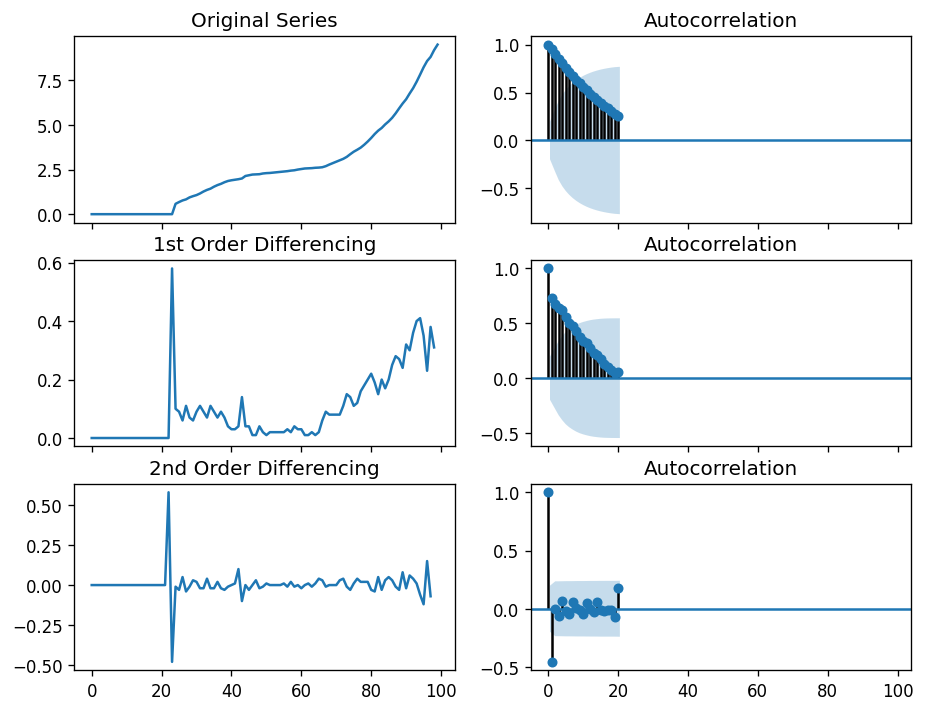

In [31]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

An ARIMA model without seasonality is represented as ARIMA(p,d,q), p is the count of AR terms, d is the count of differences needed (in this example, it is assumed d=2 is needed)to make the time series as a stationary one and q is the count of MA terms. Then we are finding the best ARIMA model to fit. Akaike’s Information Criterion (AIC), is observed here to identify the order of the best ARIMA model.

To find the optimal value of differencing (we assumed d=2 previously by plotting the time series), we can use Augmented Dickey–Fuller (ADF) test.



In [34]:
!pip install pmdarima

In [35]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-239.809, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-205.166, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-225.988, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-241.755, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-207.024, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-239.810, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-237.774, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-241.164, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.873 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 123.878
Date:                Tue, 23 Nov 2021   AIC                           -241.755
Time:                        20:00:0

The best model chosen is : ARIMA (p,d,q) = ARIMA(0,2,1).

As we assumed, second order differencing has to be performed for making the time series stationary in this scenario.

As the next step, perform diagnostic check for the residual as given below:



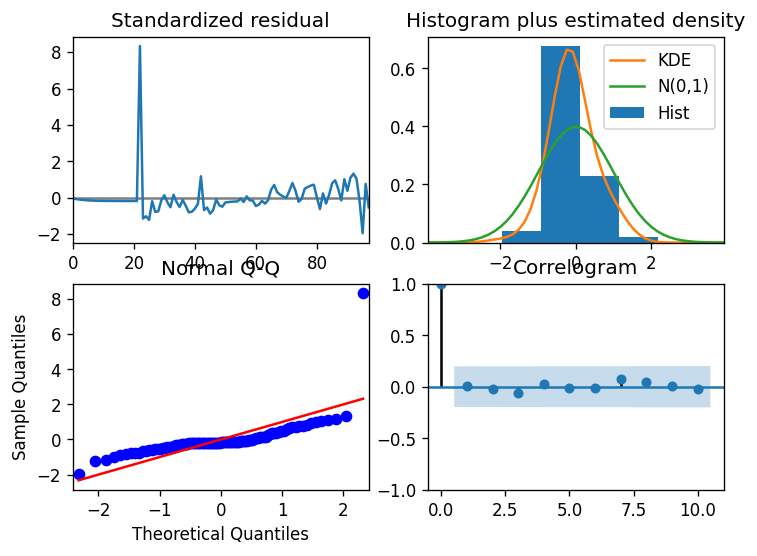

In [36]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

So the residuals are statinary (white noise in top-left), normally distributed with zero mean, and are uncorrelated with lagged versions of itself.

There is an outlier in the right tail in the Q-Q plot, but otherwise everyting looks good.

We almost finished all necessary steps. Then we can forecast the vaccination rate now.



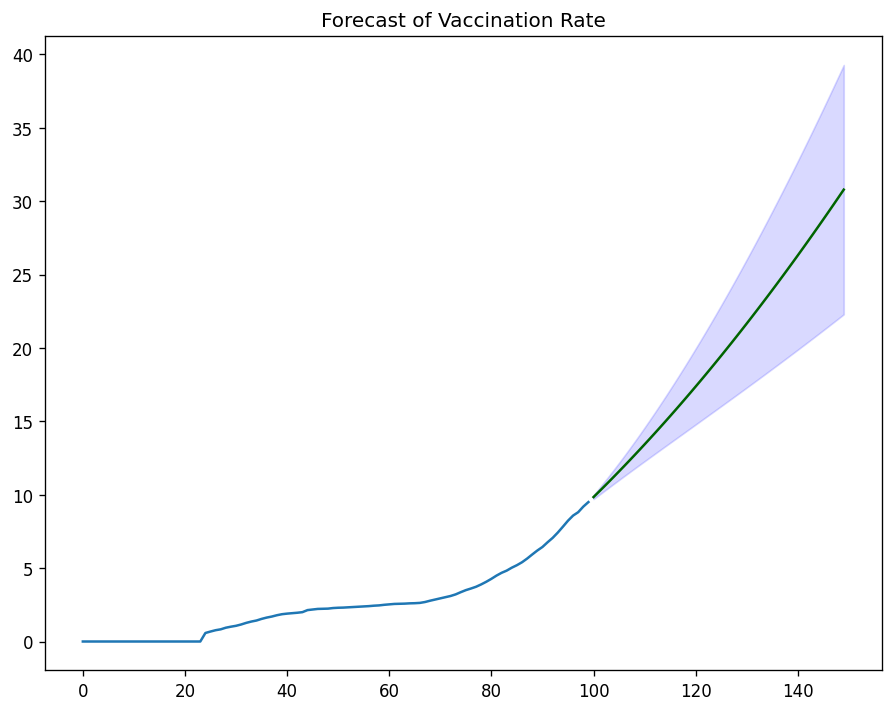

In [45]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

There may be many factors or features affecting the vaccination rate in a country. This simple time series analysis by ARIMA forecasting equation is only considering a linear relationship between the days and vaccination rate in which the predictors comprised of lags of the dependent feature (here vaccination rate) and lags of the forecasting errors.